<a href="https://colab.research.google.com/github/Janies-Garcia-Velasco/Optimizacion-no-lineal/blob/main/OC_OptNL_Ayuda_MDG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método del Descenso del Gradiente

**Oliver Cuate**

*04 de marzo de 2024*

---

En este cuaderno pondré el esqueleto del Método del Descenso del Gradiente (MDG) y la gráfica de curvas de nivel para una función cualquiera.

Para ello, voy a definir las siguientes funciones:

* `funcion(x)` recibe un vector y regresa un escalar (es la función objetivo $f(x)$)
* `gradiente(x)` recibe un vector y regresa un vector (es el gradiente de la función objetivo $\nabla f(x)$)
* `MDG(f,Gf,x0,alpha,M)` recibe la función objetivo ($f$), el gradiente ($\nabla f$), el punto inicial ($x_0$), el tamaño de paso ($\alpha_k$) y el número máximo de iteraciones ($M$). Regresa todos los valores $x_k$, con $k=0,1, \ldots, M$.

En cada iteración del MDG, se actualiza el punto de la siguiente manera:

$$ x_{k} = x_{k-1} - \alpha_{k-1} \cdot \nabla f(x_{k-1}) $$

con $k=1,2,\ldots, M.$

## Función objetivo

Usaré la del ejemplo de la gráfica, es decir:

$$f(x,y) = -e^{-x^2-y^2}$$

In [ ]:
import numpy as np

# función objetivo
def funcion(x,y):
  return -np.exp(-x**2 - y**2)

## Gradiente

El gradiente de esta función es:

$$ \nabla f(x,y) = \left( \begin{array}{c} 2 x e^{-x^2 - y^2} \\ 2 y e^{-x^2 - y^2} \end{array} \right) $$

O bien, haciendo un pequeño cambio y considerando a $x \in \mathbb{R}^2 $:

$$ \nabla f(x) = \left( \begin{array}{c} 2 x_1 e^{-x_1^2 - x_2^2} \\ 2 x_2 e^{-x_1^2 - x_2^2} \end{array} \right) $$

**Nota:** Esto es para que sea más fácil de generalizar el programa.

In [ ]:
def gradiente(x):
  g = np.empty((2,1))
  g[0] = 2*x[0]*np.exp(-x[0]**2 - x[1]**2)
  g[1] = 2*x[1]*np.exp(-x[0]**2 - x[1]**2)
  return g

## MDG

Usaré los siguientes valores para el método:

* $M = 20$
* $\alpha = 0.25$
* $x_0 = (1.2,-1.5)^T$

In [ ]:
def MDG(f,G,x0,alpha,M):
  lista = [x0]  # aquí van a ir todos los x_k
  fx = f(x0[0],x0[1])[0]  # esto no es necesario, es para ver que se reduce
  print( f'f(x_%d) = %0.4f'%(0,fx) )

  for i in range(M):
    x0 = x0 - alpha*G(x0)
    lista.append(x0)
    fx = f(x0[0],x0[1])[0]  # de nuevo, no es necesario imprimir
    print( f'f(x_%d) = %0.3f'%(i+1,fx ) )

  # transformamos en arreglo de numpy para graficar fácil
  arreglo = np.array(lista).reshape((M+1,-1))
  return arreglo

In [ ]:
x0 = np.array([[1.2],[-1.5]])
valores = MDG(funcion, gradiente, x0, 0.25, 20)

f(x_0) = -0.0250
f(x_1) = -0.027
f(x_2) = -0.030
f(x_3) = -0.034
f(x_4) = -0.038
f(x_5) = -0.042
f(x_6) = -0.048
f(x_7) = -0.056
f(x_8) = -0.066
f(x_9) = -0.078
f(x_10) = -0.095
f(x_11) = -0.118
f(x_12) = -0.151
f(x_13) = -0.199
f(x_14) = -0.270
f(x_15) = -0.375
f(x_16) = -0.523
f(x_17) = -0.703
f(x_18) = -0.862
f(x_19) = -0.953
f(x_20) = -0.987


## Gráfica

Agregamos a la gráfica que ya teníamos, las iteraciones del método.

**Nota:** Voy a ajustar el rango para que quede mejor la figura.

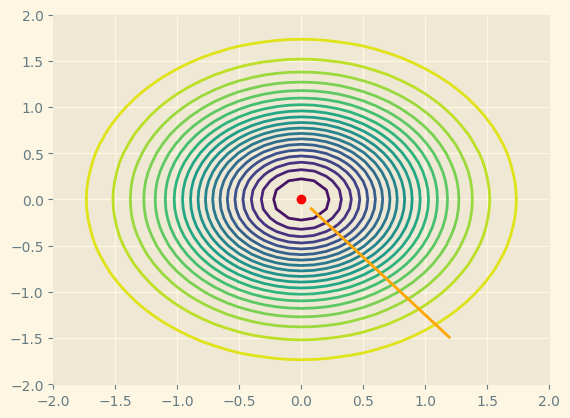

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(-2.0, 2.0, 0.1)    # intervalo de la variable x
y = np.arange(-2.0, 2.0, 0.1)    # intervalo de la variable y

X, Y = np.meshgrid(x, y)  # malla
Z = funcion(X,Y)

plt.style.use('Solarize_Light2')
plt.contour(X,Y,Z, levels=20)
plt.plot(0,0,'ro')  # óptimo
plt.plot(valores[:,0],valores[:,1],'orange')  # iteraciones del método
plt.xlim([-2.0,2.0])
plt.ylim([-2.0,2.0])
plt.show()